In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:8786")
client

Client Scheduler: tcp://127.0.0.1:8786 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 3 Cores: 36 Memory: 201.91 GB


In [13]:
import importlib
"""
Active regression example with Gaussian processes.
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF

from pyacl.core.query_strategies import QueryMarginSampling, \
    QueryRegressionStd
from pyacl.core.stop_criteria import MaxIteration
from pyacl.experiment.context import HoldOutExperiment
from pyacl.metrics.performance import Mse
from pyacl.oracle import SimulatedOracle
from pyacl.utils.misc import split

from pyacl.scenario.scenario import PoolBasedSamplingScenario


Client Scheduler: tcp://127.0.0.1:45271 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 5 Cores: 15 Memory: 84.13 GB


In [14]:
import importlib
"""
Active regression example with Gaussian processes.
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF

from pyacl.core.query_strategies import QueryMarginSampling, \
    QueryRegressionStd
from pyacl.core.stop_criteria import MaxIteration
from pyacl.experiment.context import HoldOutExperiment
from pyacl.metrics.performance import Mse
from pyacl.oracle import SimulatedOracle
from pyacl.utils.misc import split

from pyacl.scenario.scenario import PoolBasedSamplingScenario


In [15]:
# generating the data
X = np.random.choice(np.linspace(0, 20, 10000), size=200, replace=False).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.3, size=X.shape)

# assembling initial training set
train_idx, test_idx, label_idx, unlabel_idx = split(
    X=X,
    y=y,
    test_ratio=0.3,
    initial_label_rate=0.05,
    split_count=1,
    all_class=True)

# defining the kernel for the Gaussian process
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
         + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

In [11]:
# initializing the active learner
# regressor = ActiveLearner(
#     estimator=GaussianProcessRegressor(kernel=kernel),
#     query_strategy=GP_regression_std,
#     X_training=X_initial.reshape(-1, 1), y_training=y_initial.reshape(-1, 1)
# )

experiment = HoldOutExperiment(
    X,
    y,
    scenario_type=PoolBasedSamplingScenario,
    train_idx=train_idx,
    test_idx=test_idx,
    label_idx=label_idx,
    unlabel_idx=unlabel_idx,
    ml_technique=GaussianProcessRegressor(kernel=kernel),
    performance_metrics=[Mse(squared=True)],
    query_strategy=QueryRegressionStd(),
    oracle=SimulatedOracle(labels=y),
    stopping_criteria=MaxIteration(1),
    self_partition=False
)

In [12]:
result = experiment.evaluate(verbose=False)
regressor = result[0].ml_technique

# plotting the initial estimation
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(14, 7))
    x = np.linspace(0, 20, 1000)
    pred, std = regressor.predict(x.reshape(-1,1), return_std=True)
    plt.plot(x, pred)
    plt.fill_between(x, pred.reshape(-1, )-std, pred.reshape(-1, )+std, alpha=0.2)
    plt.scatter(X, y, c='k')
    plt.title('Initial estimation')
    plt.show()

ValueError: could not broadcast input array from shape (133,1) into shape (133)

In [5]:
n_queries = 10
experiment2 = HoldOutExperiment(
    X,
    y,
    scenario_type=PoolBasedSamplingScenario,
    train_idx=train_idx,
    test_idx=test_idx,
    label_idx=label_idx,
    unlabel_idx=unlabel_idx,
    ml_technique=GaussianProcessRegressor(kernel=kernel),
    performance_metrics=[Mse(squared=True)],
    query_strategy=QueryRegressionStd(),
    oracle=SimulatedOracle(labels=y),
    stopping_criteria=MaxIteration(value=n_queries),
    self_partition=False
)

result2 = experiment2.evaluate(verbose=False)
regressor2 = result2[0].ml_technique

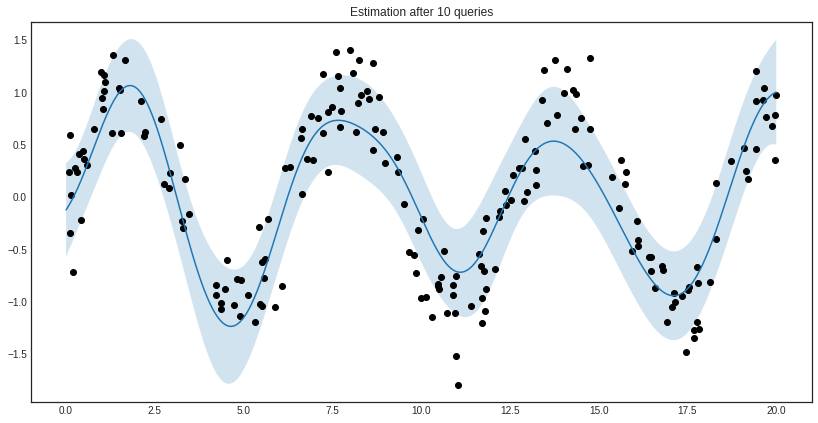

In [6]:
# # active learning
# n_queries = 10

# plotting after active learning
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(14, 7))
    x = np.linspace(0, 20, 1000)
    pred, std = regressor2.predict(x.reshape(-1,1), return_std=True)
    plt.plot(x, pred)
    plt.fill_between(x, pred.reshape(-1, )-std, pred.reshape(-1, )+std, alpha=0.2)
    plt.scatter(X, y, c='k')
    plt.title('Estimation after %d queries' % n_queries)
    plt.show()